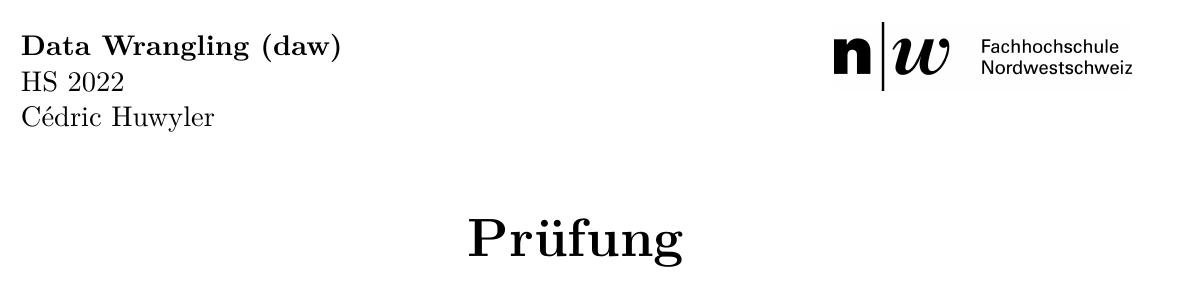

Imports (kann bei Bedarf erweitert werden):

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

verwendete Versionen:

In [ ]:
pd.__version__

In [ ]:
np.__version__

## Aufgabe 1 (39 Punkte)

Im Rahmen eines nationalen Präventionsprogramms soll untersucht werden, welche Art von Verbrechen in welchen Schweizer Kantonen wie häufig vorkommen. Du bekommst die Data Science - Aufgaben des Projekts zugewiesen und sollst als erstes die [Daten des Bundesamts für Statistik](https://www.pxweb.bfs.admin.ch/pxweb/de/px-x-1903020100_101/-/px-x-1903020100_101.px/) (Link nur zur Vollständigkeit, siehe `Straftaten.xlsx`) so aufbereiten, dass sie vom Rest deines Teams für weitere Analysen genutzt werden können.

### a) (21 Punkte)

Du ziehst dir als erstes einen Excel-Auszug der Statistiken der letzten Jahre (bereits für dich erledigt - siehe  `Straftaten.xlsx`) und führst die nötigen Data Wrangling - Schritte durch, um folgendes Format zu erhalten:

<br>

<div>
<img src="attachment:image.png" width=700>
</div>

Stelle dabei sicher, dass

* allfällige fehlende Werte explizit mit NA bzw. NaN markiert sind.
* fehlende Werte wo nötig ergänzt sind (Hinweis: Im Excel-File heissen fehlende Werte meistens, dass der erste nicht-fehlende Wert weiter oben benutzt werden soll)
* das Jahr und die Fallzahlen als Integer oder Float vorliegen.

Die Deliktgruppe ("Gruppe") steht jeweils als Straftat am Ende einer Gruppe von Straftaten und ist beginnend mit "Total" codiert. Extrahiere diese Gruppennamen sauber (ohne Total, ohne führende oder folgende Leerzeichen) und entferne die Zeilen mit "Total" in der Straftat aus den Daten.

Führe alle Schritte ausschliesslich in Python oder R durch, Manipulationen des originalen Excel-Files sind nicht erlaubt.

In [ ]:
# DEIN CODE
straftaten = pd.read_excel('Straftaten.xlsx',
                           skiprows=2,
                           usecols='a:r',
                           nrows=27040,
                           names=['par', 'Straftat', 'c', 'Kanton', 'e', 'Ausuerungsgrad', 'g', 'Aufkaerungsgrad', '2012', '2013', '2014','2015', '2016', '2017', '2018', '2019', '2020', '2021'])

straftaten = straftaten.drop(['c', 'e', 'g'], axis=1)

columns_to_fill = ['par', 'Straftat', 'Kanton', 'Ausuerungsgrad', 'Aufkaerungsgrad']
straftaten[columns_to_fill] = straftaten[columns_to_fill].fillna(method='ffill')

straftaten['Straftat'] = straftaten['par'].astype(str).str.cat(straftaten['Straftat'].astype(str), sep=' - ')
straftaten = straftaten.drop('par', axis=1)

straftaten.head()

In [ ]:
straftaten.describe()

In [ ]:
non_integer_values = pd.to_numeric(straftaten['2012'], errors='coerce').isna()

non_integer_df = straftaten[non_integer_values]
non_integer_df

In [ ]:
columns_to_convert = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

for column in columns_to_convert:
    straftaten[column] = pd.to_numeric(straftaten[column], errors='coerce')


In [ ]:
straftaten.describe()


In [ ]:

# Check for NaN values
print(straftaten.isna().sum())
print('--------------------------')

# Check for zeros
print(straftaten.eq(0).sum())

In [ ]:
straftaten.tail(10)

In [ ]:
totals = straftaten[straftaten['Straftat'].str.contains('Total')]
straftaten = straftaten[~straftaten['Straftat'].str.contains('Total')]

totals = totals.reset_index(drop=True)
straftaten = straftaten.reset_index(drop=True)



In [ ]:
straftaten

In [ ]:
totals

### b) (10 Punkte)

Für die Berechnung von relativen Häufigkeiten soll zusätzlich die Anzahl der Einwohner:innen pro Kanton und Jahr hinzugefügt werden. Du findest passende Daten in `einwohnerzahlen.txt`. Lese sie ein, präprozessiere sie wo nötig und füge sie an das bestehende Data Frame.

**Hinweise:** 

* Die Kantonsbezeichnungen stimmen nicht genau mit dem ersten Datensatz überein. Passe die Kantone im eingelesenen Einwohner-Data Frame entsprechend an, indem du dir zum Beispiel einen Matching-Table baust. Ein 'Kanton' ist überflüssig und kann entfernt werden - findest du heraus welchen?

* Aufpassen, falls du kategorische Datentypen gesetzt hast!

In [ ]:
# DEIN CODE

### c) (6 Punkte)

Zur Überprüfung der Datenqualität möchtest du eine kurze Testaufgabe lösen. Dazu berechnest du die totale Anzahl der Straftaten pro 1000 Einwohner:innen pro Kanton und Jahr und visualisierst diese auf einer Zeitachse nach Kanton. Nenne zusätzlich die Top 3 der Kantone nach totalen Straftaten im Jahr 2021.

**Hinweis:** Das ist aber nur ein Test, daraus kannst du noch keine Schlussfolgerungen ziehen, es kann durchaus grosse Unterschiede darin geben, wie verschiedene Straftaten in verschiedenen Kantonen erfasst werden.

In [ ]:
# DEIN CODE

### Aufgabe 2 (28 Punkte)

Du hast eine neue Stelle bei einer Immobilienplattform begonnen, die Personen auf dem Web ihre Häuser zum Verkauf ausschreiben lässt. Dabei kann auch das Baujahr angegeben werden, aus unbekannten Gründen tun dies jedoch nur etwa 45\% aller Benutzer:innen. Nun möchte deine Firma evaluieren, ob es Sinn machen könnte, dieses Baujahr mit einem Imputationsmodell zu ergänzen.

Als ersten Arbeitsauftrag bekommst du eine stark abgespeckte Version des Datensets und sollst prüfen, welche Genauigkeit realistisch möglich ist.

### a) (2 Punkte)

Lies das Datenset `housing.csv` als erstes einmal ein und verschaffe dir eine Übersicht. Untersuche insbesondere, welcher Anteil der Werte pro Spalte fehlt. Die genaue Bedeutung der einzelnen Spalten spielt für diese Aufgabe keine Rolle (die Namen sind bis auf `Distance` intuitiv, diese steht für die Distanz vom geschäftlichen Stadtzentrum).

In [ ]:
# DEIN CODE

### b) (6 Punkte)

Damit dein Imputationsmodell auf Daten imputen kann, die es vorher noch nicht gesehen hat, erstellst du dir als erstes ein Trainings- und Testset. Mische dazu die Zeilen des Datensets neu und teile es in zwei Teile - die ersten 60% in das Trainingset und die restlichen 40% in das Testset. Lösche alle Zeilen aus dem Testset, in denen `YearBuilt` fehlt. Kopiere danach die `YearBuilt`-Spalte aus dem Testset in eine separate Variable `year_built_test` und setze anschliessend im Testset alle `YearBuilt`-Werte auf NA bzw. NaN. Stelle sicher, dass alles sauber funktioniert hat.

In [ ]:
# DEIN CODE

### c) (6 Punkte)

Nun bist du bereit zum Imputieren. Trainiere ein KNN-Imputationsmodell (mit jeweils 4 Nachbarn) auf dem Trainingset und imputiere dann damit die Werte für `YearBuilt` im Testset. Vergleiche die imputierten Werte mit den tatsächlichen Werten, indem du den RMSE berechnest:

$$\text{RMSE} = \sqrt{\frac1n \sum_{i=1}^n (y_i-\hat{y}_i)^2},$$

wobei $y$ die tatsächlichen Werte und $\hat{y}$ die imputierten Werte bezeichne. Wie viele Jahre liegt dein Modell damit typischerweise daneben?

In [ ]:
# DEIN CODE

### d) (8 Punkte)

In Teilaufgabe c) hast du ein KNN-Imputationsmodell mit 4 Nachbarn angewendet. Du möchtest nun prüfen, ob es allenfalls eine bessere Anzahl Nachbarn gibt. Schreibe dazu in einem ersten Schritt eine Funktion `compute_rmse()`, die als Argumente dein Training- und Testset, die tatsächlichen Werte `year_built_test` und die Parameter für den Imputer (oder gleich die Imputer-Klasse) nimmt.

Benutze anschliessend die Funktion, um die RMSE-Werte für verschiedene Anzahlen von Nachbarn zu berechnen. Verwende konkret die Anzahlen 1, 3, 5, 10, 20 und 30. Stelle RMSE gegen Anzahl Nachbarn graphisch dar.

In [ ]:
# DEIN CODE

### e) (6 Punkte)

Du bekommst den Tipp, dass ein KNN-Imputationsmodell noch besser funktioniere, wenn die Daten zuerst standard-skaliert werden, dann imputiert wird und dann die Daten wieder zurückskaliert werden. Erstelle eine entsprechende Funktion `compute_rmse_scaled()`, die so vorgeht und erstelle eine entsprechende Version des Plots aus Teilaufgabe d). Erreichst du einen tieferen RMSE?

In [ ]:
# DEIN CODE